In [2]:
import skimage
import skimage.io
import skimage.morphology
import skimage.filters
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

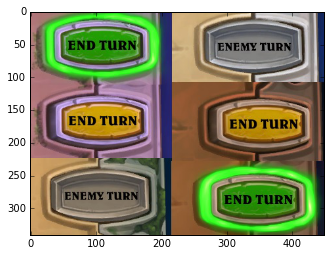

In [2]:
image = skimage.io.imread('turns.jpg')

plt.imshow(image)

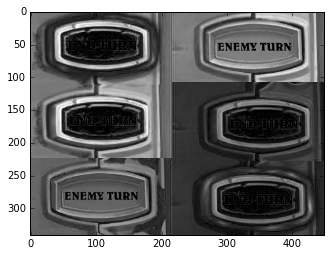

In [3]:
plt.imshow(image[:,:,2], cmap=plt.cm.gray)

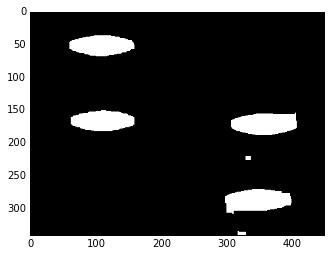

In [4]:
b_image = np.invert(image[:,:,2])

neg = np.zeros_like(b_image)
neg[b_image > 220] = 1

neg = skimage.morphology.closing(neg, skimage.morphology.square(7))
for i in range(4):
    neg = skimage.morphology.erosion(neg, skimage.morphology.square(7))



plt.imshow(neg, cmap=plt.cm.gray)

In [3]:
from hearthstone.processing import Factory

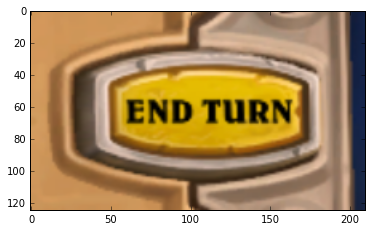

In [17]:
img = skimage.io.imread('data/screenshots/hs_smaller.png')
img = skimage.transform.resize(img, (1080, 1920), preserve_range=True)
img = np.asarray(img, dtype=np.uint8)

turn_img = Factory.cut_off_image(img, (1450, 430), (210, 125))
plt.imshow(turn_img)

In [21]:
def whos_turn(image):
    b_image = np.invert(image[:,:,2])

    neg = np.zeros_like(b_image)
    neg[b_image > 220] = 1

    neg = skimage.morphology.closing(neg, skimage.morphology.square(7))
    for i in range(4):
        neg = skimage.morphology.erosion(neg, skimage.morphology.square(7))

    plt.imshow(neg, cmap=plt.cm.gray)
    c = len(neg[neg == 1])
    
    return True if c > 100 else 0

In [18]:
b = Factory.players_turn(img)
print("Player's turn" if b else "Enemy's turn")

Player's turn


# Detekce aktivní many

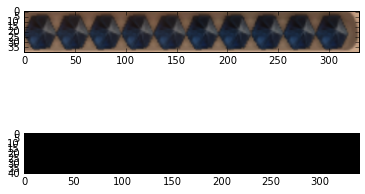

In [21]:
img = skimage.io.imread('data/screenshots/hs_smaller.png')
img = skimage.transform.resize(img, (1080, 1920), preserve_range=True)
img = np.asarray(img, dtype=np.uint8)
mana = Factory.cut_off_image(img, (1305, 980), (340, 40))

mana = mana[:,:,0]
neg = np.zeros_like(mana)
neg[mana > 175] = 1
# neg = mana

from skimage.filters import sobel
from scipy import ndimage
neg = sobel(neg)
neg = ndimage.binary_fill_holes(neg)

neg = skimage.morphology.erosion(neg, skimage.morphology.square(3))
neg = skimage.morphology.dilation(neg, skimage.morphology.diamond(5))

fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].imshow(Factory.cut_off_image(img, (1315, 980), (330, 40)))
ax[1].imshow(neg, cmap=plt.cm.gray)

# Detekce pasivní many

5


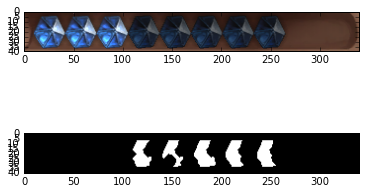

In [192]:
img = skimage.io.imread('data/screenshots/Hearthstone Screenshot 04-07-17 11.13.16.png')
mana = Factory.cut_off_image(img, (1305, 980), (340, 40))

mana = mana[:,:,0]
neg = np.zeros_like(mana)
neg[mana < 25] = 1

from skimage.filters import sobel
from scipy import ndimage
neg = sobel(neg)
neg = ndimage.binary_fill_holes(neg)

neg = skimage.morphology.erosion(neg, skimage.morphology.diamond(4))

fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].imshow(Factory.cut_off_image(img, (1305, 980), (340, 40)))
ax[1].imshow(neg, cmap=plt.cm.gray)

b = skimage.measure.label(neg)
print len(np.unique(b)) - 1

In [471]:
def mana_active(image):
    mana = Factory.cut_off_image(img, (1305, 980), (340, 40))

    mana = mana[:,:,0]
    neg = np.zeros_like(mana)
    neg[mana > 175] = 1
    # neg = mana

    from skimage.filters import sobel
    from scipy import ndimage
    neg = sobel(neg)
    neg = ndimage.binary_fill_holes(neg)

#     neg = skimage.morphology.erosion(neg, skimage.morphology.square(3))
#     neg = skimage.morphology.dilation(neg, skimage.morphology.diamond(5))

    fig, ax = plt.subplots(nrows=2, ncols=1)
    ax[0].imshow(Factory.cut_off_image(img, (1305, 980), (340, 40)))
    ax[1].imshow(neg, cmap=plt.cm.gray)
    
    b = skimage.measure.label(neg)
    return len(np.unique(b)) - 1

def mana_pasive(image):
    #mana = Factory.cut_off_image(image, (1305, 980), (340, 40))
    mana = image

    mana = mana[:,:,0]
    neg = np.zeros_like(mana)
    neg[mana < 30] = 1

    from skimage.filters import sobel
    from scipy import ndimage
    neg = sobel(neg)
    neg = ndimage.binary_fill_holes(neg)

    neg = skimage.morphology.erosion(neg, skimage.morphology.diamond(4))

    fig, ax = plt.subplots(nrows=2, ncols=1)
    ax[0].imshow(Factory.cut_off_image(image, (1305, 980), (340, 40)))
    ax[1].imshow(neg, cmap=plt.cm.gray)

    b = skimage.measure.label(neg)
    return len(np.unique(b)) - 1

def mana_actual(image):
    a = mana_active(image)
    p = mana_pasive(image)
    print('Active: %s' % a)
    print('Passive: %s' % p)
    
    return a+p

4

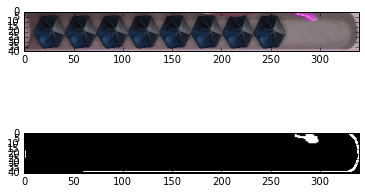

In [253]:
img = skimage.io.imread('data/screenshots/Hearthstone Screenshot 04-07-17 13.56.18.png')

# plt.figure()
# plt.imshow(Factory.cut_off_image(img, (1305, 980), (340, 40)))

mana_active(img)

# print('Actual turn: %s' % mana_actual(img))

In [254]:
import cv2

In [260]:
mana1 = Factory.cut_off_image(skimage.io.imread('data/screenshots/Hearthstone Screenshot 04-02-17 11.42.36.png'), (1305, 980), (340, 40))
mana2 = Factory.cut_off_image(skimage.io.imread('data/screenshots/Hearthstone Screenshot 04-02-17 11.43.16.png'), (1305, 980), (340, 40))
mana3 = Factory.cut_off_image(skimage.io.imread('data/screenshots/Hearthstone Screenshot 04-02-17 11.46.50.png'), (1305, 980), (340, 40))

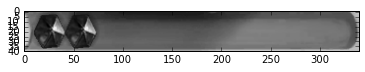

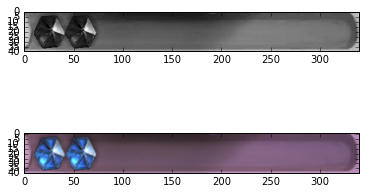

In [582]:
mana_bgr = Factory.cut_off_image(skimage.io.imread('data/mana_bgr.jpg'), (1315, 980), (340, 40))

#pom = skimage.color.rgb2gray(mana3)-skimage.color.rgb2gray(mana_bgr)
pom = mana2[:,:,0]-skimage.color.rgb2gray(mana_bgr)
plt.imshow(pom, cmap=plt.cm.gray)

neg = np.zeros_like(pom)
neg[pom < 70] = 1

fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].imshow(pom, cmap=plt.cm.gray)
ax[1].imshow(mana2)


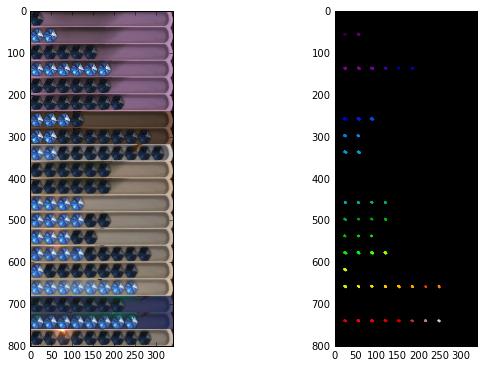

In [94]:
manas = skimage.io.imread('data/manas_testing.jpg')

pom = manas[:,:,2]
import skimage.exposure

neg = np.zeros_like(pom)
neg[pom > 225] = 1
a = neg

pom = manas[:,:,0]
neg = np.zeros_like(pom)
neg[pom > 205] = 1
neg = skimage.morphology.dilation(neg, skimage.morphology.disk(8))
b = neg

neg = (a+b)/2
neg = skimage.morphology.erosion(neg, skimage.morphology.disk(2))
neg = skimage.morphology.dilation(neg, skimage.morphology.disk(3))

fig, ax = plt.subplots(figsize=(10,6), nrows=1, ncols=2)
ax[0].imshow(manas, cmap=plt.cm.gray)
ax[1].imshow(skimage.measure.label(neg, background=0), cmap='spectral')
#ax[1].imshow(neg, cmap=plt.cm.gray)

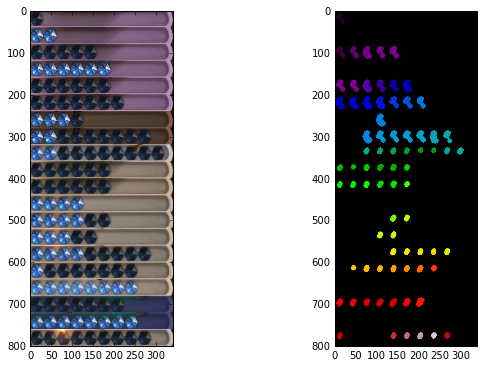

In [95]:
manas = skimage.io.imread('data/manas_testing.jpg')

mana = manas[:,:,0]
neg = np.zeros_like(mana)
neg[mana < 25] = 1

from skimage.filters import sobel
from scipy import ndimage
neg = sobel(neg)
neg = ndimage.binary_fill_holes(neg)

neg = skimage.morphology.erosion(neg, skimage.morphology.star(5))
neg = skimage.morphology.dilation(neg, skimage.morphology.star(4))
neg = skimage.morphology.dilation(neg, skimage.morphology.diamond(3))
neg = skimage.morphology.erosion(neg, skimage.morphology.disk(3))

fig, ax = plt.subplots(figsize=(10,6), nrows=1, ncols=2)
ax[0].imshow(manas, cmap=plt.cm.gray)
#ax[1].imshow(neg, cmap=plt.cm.gray)
ax[1].imshow(skimage.measure.label(neg, background=0), cmap='spectral')

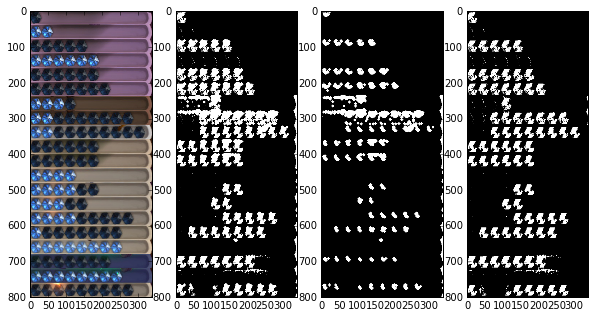

In [88]:
# Seconds attempt to segment passive mana
manas = skimage.io.imread('data/manas_testing.jpg')

mana = manas[:,:,2]
mana = np.invert(mana)
# neg1 = np.zeros_like(mana)
neg1[mana < 230] = 0
neg1[mana >= 230] = 1
neg1 = skimage.morphology.dilation(neg1, skimage.morphology.disk(2))
neg1 = skimage.morphology.dilation(neg1, skimage.morphology.disk(2))

mana = manas[:,:,0]
neg2 = np.zeros_like(mana)
neg2[mana < 30] = 1

neg = neg1 + neg2
neg[neg > 0] = 1

# neg = skimage.morphology.dilation(neg, skimage.morphology.star(2))
# neg = skimage.morphology.erosion(neg, skimage.morphology.star(4))
# neg = skimage.morphology.dilation(neg, skimage.morphology.star(4))

# from skimage.filters import sobel
# from scipy import ndimage
# neg = sobel(neg)
# neg = ndimage.binary_fill_holes(neg)

# neg = skimage.morphology.erosion(neg, skimage.morphology.star(5))
# neg = skimage.morphology.dilation(neg, skimage.morphology.star(4))
# neg = skimage.morphology.dilation(neg, skimage.morphology.diamond(3))
# neg = skimage.morphology.erosion(neg, skimage.morphology.disk(3))

fig, ax = plt.subplots(figsize=(10,6), nrows=1, ncols=4)
ax[0].imshow(manas, cmap=plt.cm.gray)
ax[1].imshow(neg, cmap=plt.cm.gray)
ax[2].imshow(neg1, cmap=plt.cm.gray)
ax[3].imshow(neg2, cmap=plt.cm.gray)

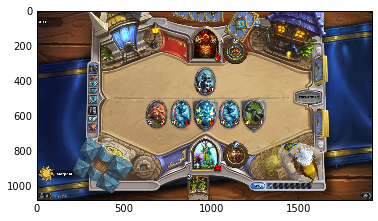

In [7]:
img = skimage.io.imread('data/screenshots/Hearthstone Screenshot 04-08-17 13.16.48.png')

plt.imshow(img)

In [3]:
from hearthstone.processing import Factory

In [8]:
Factory.turn(img)

8